# Example 5 : Playing with Scikit-Learn

[Scikit-learn](https://scikit-learn.org/stable/) is a Python package with many functions useful for machine learning and data analysis. Here we will show a couple of examples using some of the functionality of scikit-learn on some MUSIC data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 200 # bigger figures

# Use more REVTEX-esque fonts
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.serif"] = "STIXGeneral"
mpl.rcParams["mathtext.fontset"] = "stix"

To keep things a little simplier, we will work with the sum of the left and right anode. However, everything we are going to do here could be extended to use the full segmented anode as seperate features.

In [2]:
import uproot
#
file = uproot.open("test_music_data.root")   
tree = file['tree']
branches = tree.arrays()

In [3]:
dict_branches = {}

# strip0 first
dict_branches.update({'s0':branches['strip0'][branches['seg'] == 1]})
# segmented anode sum left and right
for i in range(1,17):
    dict_branches.update({'s%i' % i : (branches['edepl'][branches['seg'] == i] + branches['edepr'][branches['seg'] == i])})
# strip17
dict_branches.update({'s17':branches['strip17'][branches['seg'] == 1]})

df = pd.DataFrame(dict_branches)

df

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17
0,1003.0,416.0,401.0,420.0,377.0,410.0,411.0,417.0,433.0,456.0,451.0,426.0,497.0,497.0,492.0,495.0,494.0,402.0
1,1091.0,397.0,403.0,408.0,397.0,398.0,436.0,392.0,410.0,408.0,449.0,458.0,465.0,466.0,563.0,502.0,522.0,380.0
2,1083.0,426.0,395.0,406.0,410.0,394.0,406.0,401.0,427.0,443.0,444.0,441.0,485.0,484.0,539.0,503.0,522.0,402.0
3,1002.0,405.0,378.0,394.0,417.0,441.0,435.0,428.0,401.0,443.0,451.0,458.0,506.0,472.0,479.0,503.0,504.0,400.0
4,1015.0,393.0,398.0,410.0,421.0,439.0,413.0,411.0,438.0,391.0,422.0,451.0,479.0,477.0,478.0,476.0,506.0,366.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267824,1040.0,401.0,396.0,418.0,413.0,450.0,444.0,405.0,407.0,423.0,423.0,446.0,492.0,464.0,467.0,454.0,498.0,403.0
267825,969.0,366.0,396.0,422.0,399.0,444.0,383.0,419.0,419.0,413.0,419.0,450.0,469.0,475.0,496.0,482.0,517.0,384.0
267826,958.0,376.0,395.0,394.0,398.0,432.0,415.0,402.0,411.0,430.0,434.0,465.0,473.0,459.0,481.0,456.0,497.0,398.0
267827,1006.0,383.0,371.0,430.0,400.0,447.0,419.0,402.0,393.0,411.0,407.0,428.0,475.0,471.0,498.0,489.0,442.0,393.0


# Scaling Data 

When working with tabular data, it is common to scale the data before feeding it into a machine-learning algorithm. Scikit-learn has several scaling functions within the [preprocessing module](https://scikit-learn.org/1.5/modules/preprocessing.html). Let's look at four of those scaling functions and see what effect they have on beam-like traces. 

- StandardScaler: Scales the data so that the distribution of the values has a mean of zero and a variance equal to one.
- MinMaxScaler: Scales the dataset so values are between zero and one. The default interval is [0,1]; however, you can specify a custom range. If the data contains positive and negative values, a related scaler MaxAbsScaler, will scale over the interval [-1,1].
- RobustScaler: The RobustScaler is similar to the Standard Scaler in that it also moves the center of the distribution to zero. However, the robust scaler uses the interquartile range rather than the variance.
- PowerTransformer: The power transformer maps the values to a Gaussian distribution by applying an algorithm to each feature of the data set individually. 


In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

<div class="alert alert-block alert-info">
FYI: When you apply one of the scikit scalers to a dataframe, you will not get a dataframe back; instead, you will get a numpy array back.  
</div>

We will again use suppress warnings on this next cell. We apply each of the scalers to the MUSIC data. The power transformer isn't too happy with the MUSIC data; at some point, it raises an overflow. Aside from the warning, the power transformer still finishes scaling the data. We included the power transformer for comparison purposes, not because we expect it to be the best scaler to use.

In [5]:
import warnings
warnings.filterwarnings('ignore')

df_Standard = StandardScaler().fit_transform(df)
df_MinMax = MinMaxScaler().fit_transform(df)
df_Robust = RobustScaler().fit_transform(df)
df_Power = PowerTransformer().fit_transform(df)

## Traces

With the data scaled let's take a look at some beam-like traces. In the figure below we show two beam traces (solid and dashed black lines) in the top plot. In the bottom plot we show what happens to the traces after applying the different scalers (different colors of the solid and dashed lines).

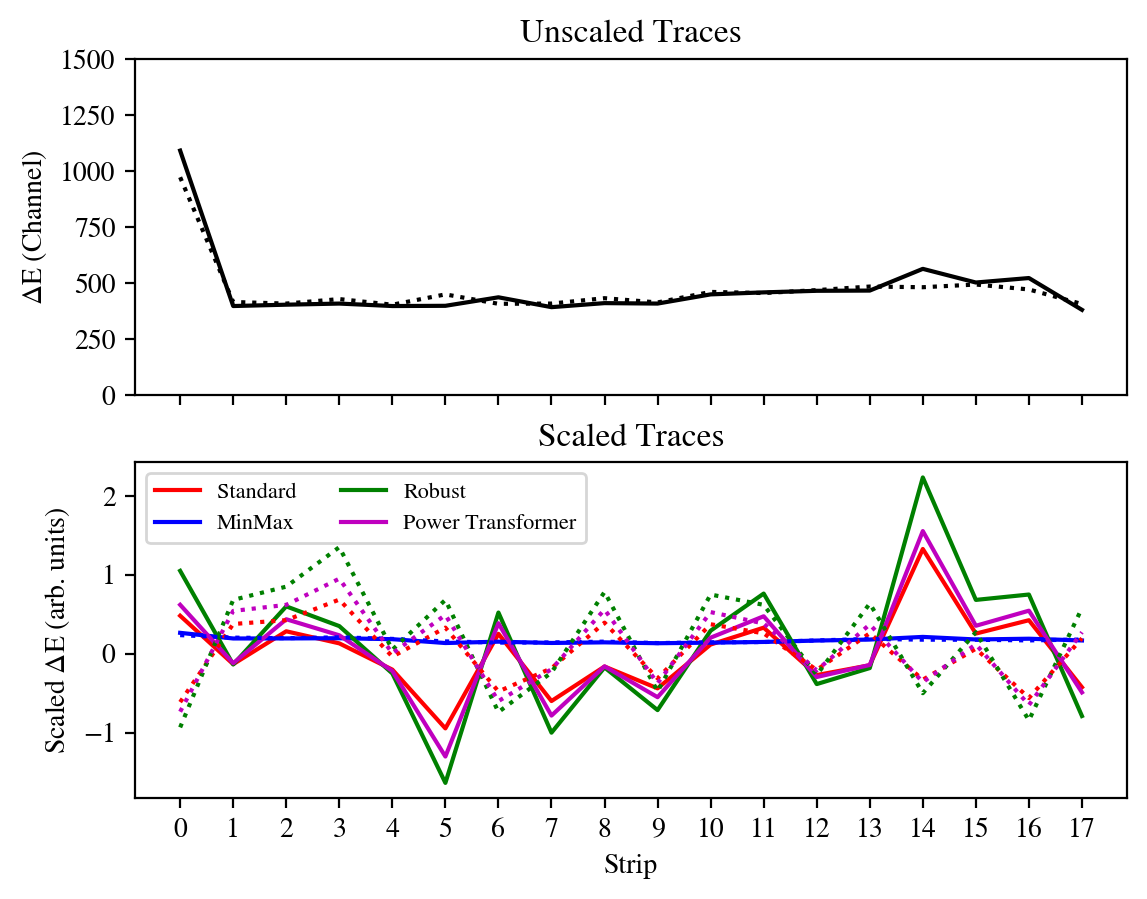

In [6]:
from matplotlib.lines import Line2D
strip_num = np.arange(0,18)
traces = [1,58500]
linestyle = '-'

fig, ax = plt.subplots(2,1, sharex=True)

for trace in traces:
    ax[0].plot(strip_num, df.iloc[trace].values, color='k', linestyle=linestyle)
    #
    ax[1].plot(strip_num, df_Standard[trace], color='r', linestyle=linestyle)
    ax[1].plot(strip_num, df_MinMax[trace], color='b', linestyle=linestyle)
    ax[1].plot(strip_num, df_Robust[trace], color='g', linestyle=linestyle)
    ax[1].plot(strip_num, df_Power[trace], color='m', linestyle=linestyle)
    linestyle = ':'
#
ax[0].set_title('Unscaled Traces')
ax[1].set_title('Scaled Traces')

# axes
ax[0].set_ylabel(r'$\Delta$E (Channel)')
ax[0].set_ylim(0,1500)
ax[1].set_xlabel('Strip')
ax[1].set_xticks(strip_num)
ax[1].set_ylabel(r'Scaled $\Delta$E (arb. units)')

# legend
# get objects relevant for legend
handles, labels = ax[1].get_legend_handles_labels()
# create dummy objects for artists
Standard = Line2D([0], [0], label='Standard', color='r')
MinMax = Line2D([0], [0], label='MinMax', color='b')
Robust = Line2D([0], [0], label='Robust', color='g')
Power = Line2D([0], [0], label='Power Transformer', color='m')
# add to handles
handles.extend([Standard, MinMax, Robust, Power])

ax[1].legend(handles=handles, ncol = 2, fontsize=8)
plt.show()

## 2D Distributions

In [7]:
df_sums = pd.DataFrame({'grid':branches['grid'][branches['seg'] == 1]})
df_sums['normal'] = df.iloc[:,:].sum(axis=1)
df_sums['standard'] = df_Standard.sum(axis=1)
df_sums['minmax'] = df_MinMax.sum(axis=1)
df_sums['robust'] = df_Robust.sum(axis=1)
df_sums['power'] = df_Power.sum(axis=1)

df_sums

,grid,normal,standard,minmax,robust,power
0,1522.0,8498.0,0.927057,3.119410,3.602717,1.849662
1,1468.0,8545.0,0.281525,3.120784,1.973629,0.744463
2,1421.0,8611.0,2.172221,3.156521,5.629585,3.239675
3,1450.0,8517.0,1.317867,3.120970,4.473217,2.501848
4,1487.0,8384.0,-1.903742,3.069029,-1.920456,-1.657658
...,...,...,...,...,...,...
267824,1592.0,8444.0,-0.643290,3.091689,0.541307,0.050958
267825,1559.0,8322.0,-2.984025,3.045807,-3.473283,-3.244795
267826,1439.0,8274.0,-3.813081,3.023086,-5.008164,-4.147655
267827,1524.0,8265.0,-4.599302,3.017709,-6.201391,-5.305817


In [8]:
from matplotlib.colors import LogNorm

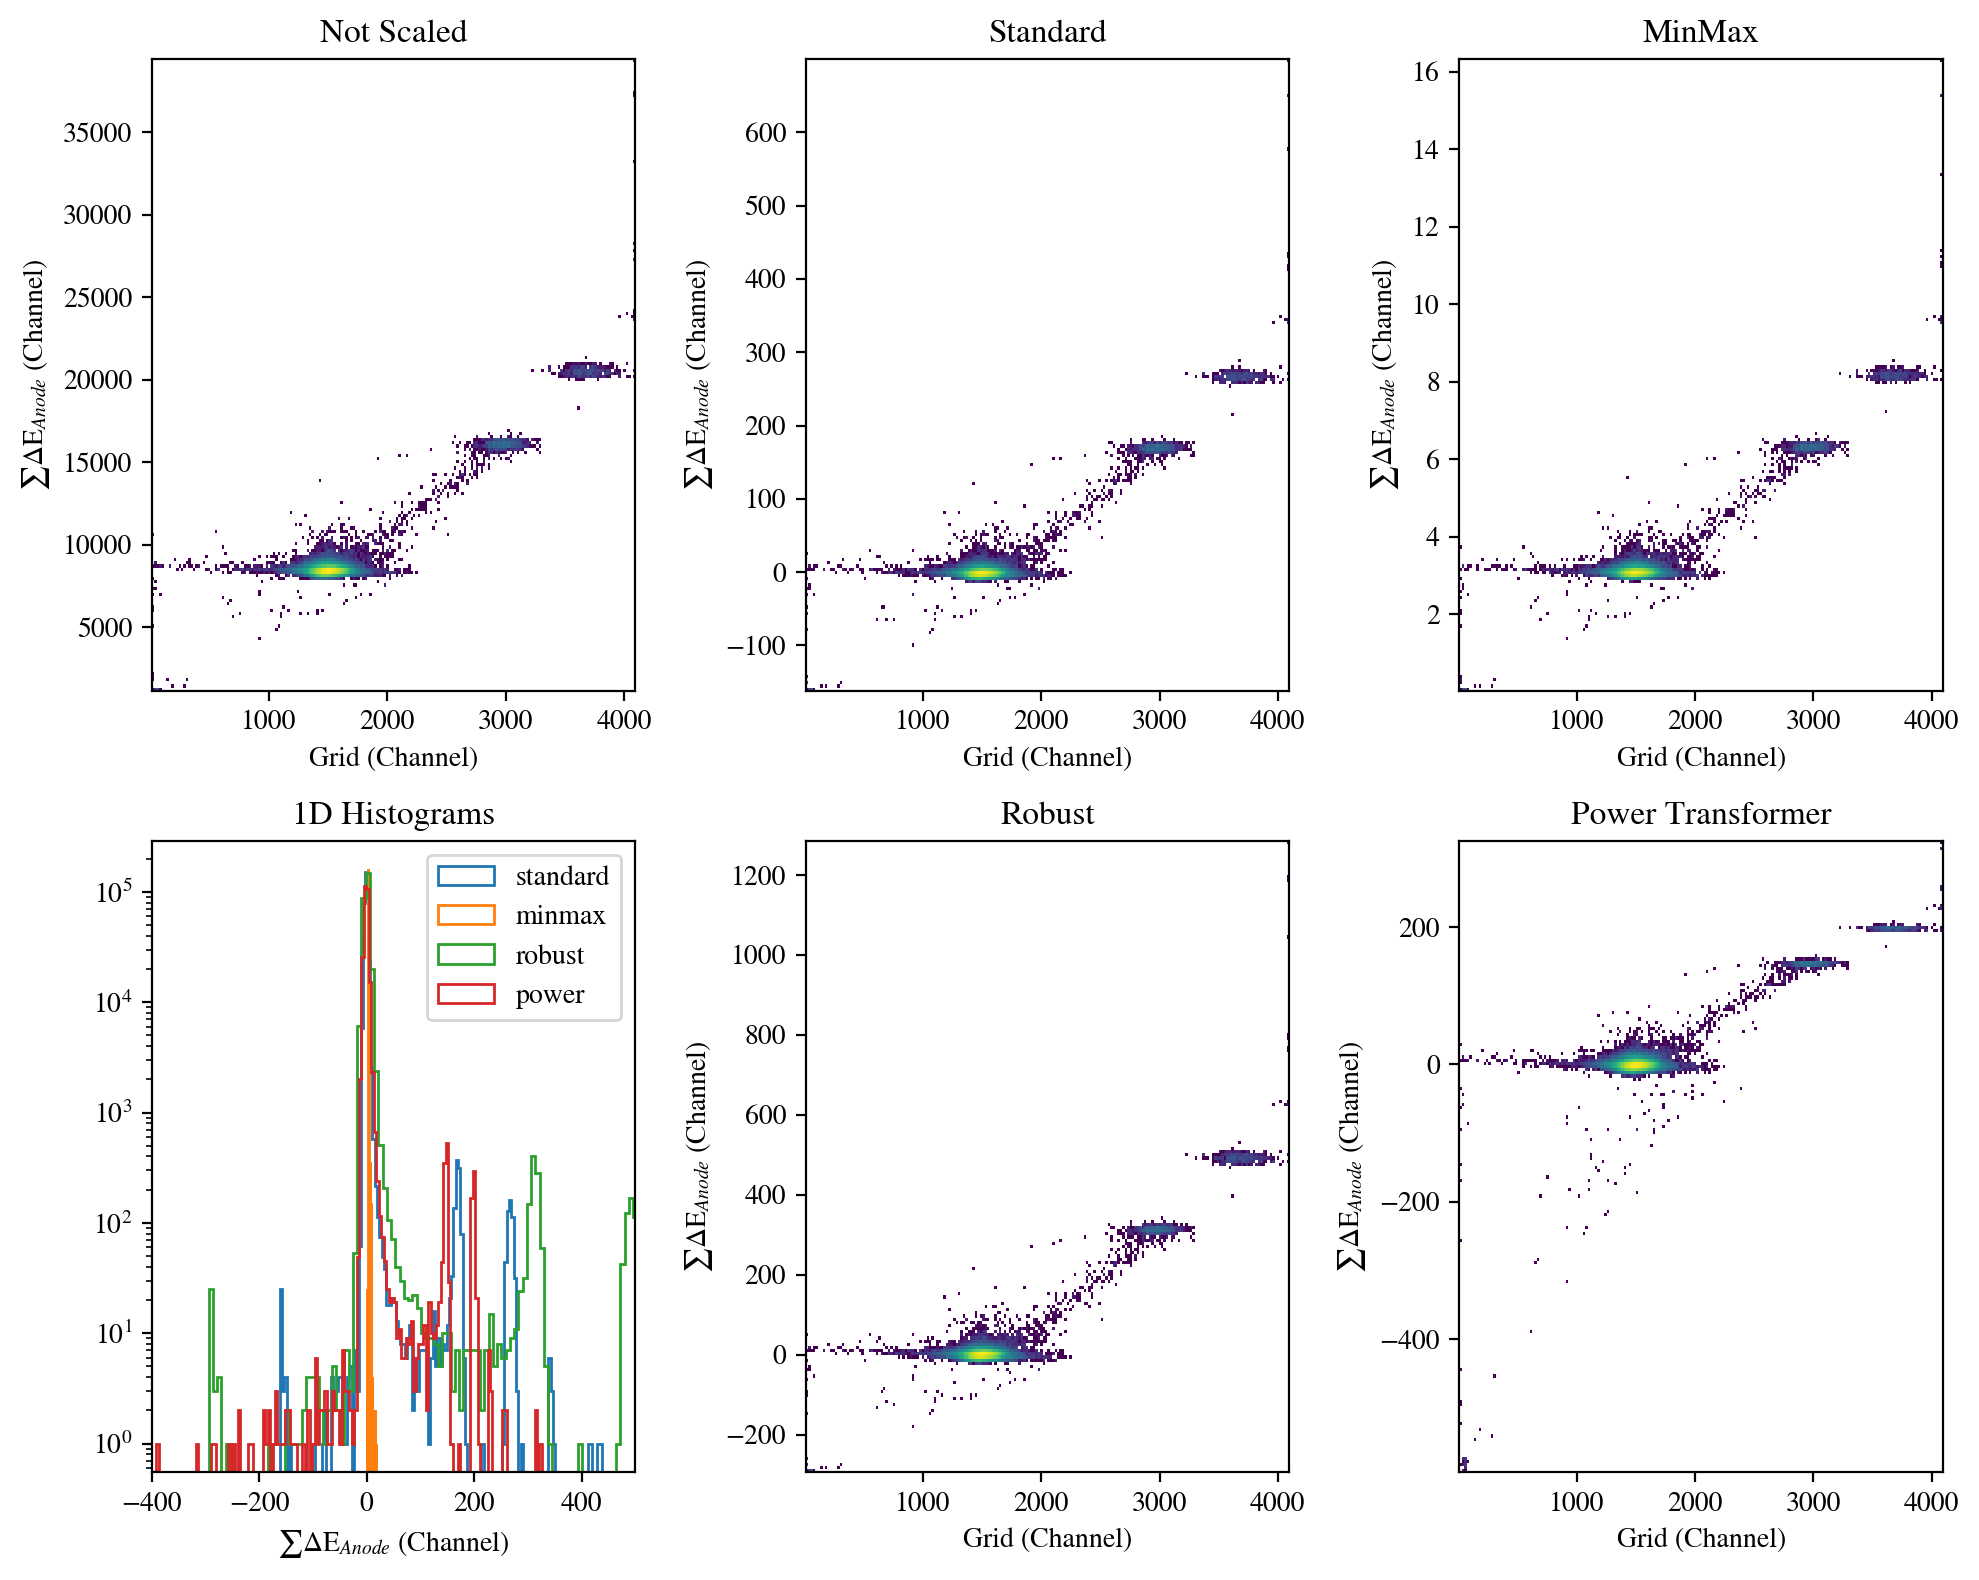

In [9]:
fig, ax = plt.subplots(2,3)
# top left
ax[0,0].hist2d(df_sums['grid'], df_sums['normal'], bins=200, norm=LogNorm())
# top middle
ax[0,1].hist2d(df_sums['grid'], df_sums['standard'], bins=200, norm=LogNorm())
# top right
ax[0,2].hist2d(df_sums['grid'], df_sums['minmax'], bins=200, norm=LogNorm())
# bottom right
for j in range(2,6): 
    ax[1,0].hist(df_sums.iloc[:,j], bins=200, histtype='step', label=df_sums.columns.to_list()[j])
# bottom middle:
ax[1,1].hist2d(df_sums['grid'], df_sums['robust'], bins=200, norm=LogNorm())
# bottom right
ax[1,2].hist2d(df_sums['grid'], df_sums['power'], bins=200, norm=LogNorm())

row = [0, 0, 0, 1, 1, 1]
col = [0, 1, 2, 0, 1, 2]
titles = ['Not Scaled', 'Standard', 'MinMax', '1D Histograms', 'Robust', 'Power Transformer']
for i in range(0,6):
    ax[row[i],col[i]].set_title(titles[i])
    ax[row[i],col[i]].set_xlabel('Grid (Channel)')
    ax[row[i],col[i]].set_ylabel(r'$\sum\Delta$E$_{Anode}$ (Channel)')
#
ax[1,0].set_xlabel(r'$\sum\Delta$E$_{Anode}$ (Channel)')
ax[1,0].set_ylabel('')
ax[1,0].set_xlim(-400,500)
ax[1,0].set_yscale('log')
ax[1,0].legend()

fig.set_size_inches(10,8)
plt.tight_layout()
plt.show()

# Detecting Outliers Using an Isolation Forest

In many data anaylsis or data science tasks, independant of what your data looks like (shape, magnitude, etc...) we will need to be aware of outlier events. These ideally should be a rather small percentage of the data set itself. However, even a few events can potentially skew your results or analysis. At a minimum, one should identify them (if you ever suspect they could be influencing your anaylsis, it is better to know they're there when you start to second guess your first results). 

For nuclear physics experiments, one example of this might be beam contaminants. However, in most experiments we are trying to find a relativley small signal in some larger bulk distribution. In our case here, of our total signal  the fusions make up a small component compared to beam events. So, we can in that sense flip the problem of outlier detection. We want to find the outliers (potential fusion events) from the inliers (beam like events). This is sometimes called "novelty detection", however in either case (finding a novelty or trying to identify outliers) the algorithms and sometimes even the code is the same. One such algorithm is called [Isolation Forest](https://doi.org/10.1109/ICDM.2008.17). Scikit-learn has an Isolation Forest Algorithm which we can try out on our test MUSIC data.

In [10]:
from sklearn.ensemble import IsolationForest

Like most of the "tree" estimators in scikit-learn we have some options to tune how the algorithm goes through to train the estimator. So, even thought this method is an unsupervised ML algorithm (you can give it the data without training the algorithm to fit/predict with the data) there are still hyperparameters than you can tune.

In [11]:
IsoFor = IsolationForest(n_estimators=100, # Number of trees to use
                         max_samples='auto', # How many samples to train over
                         contamination='auto',  # auto does min(256, N_samples)
                         random_state=0) # Pick a random seed for reproducibility

IsoFor.fit(df_MinMax)

IsoFor

IsolationForest(random_state=0)

In [12]:
predictions = IsoFor.predict(df_MinMax)

For each of our events the Isolation Forest gives us a score which is +1 for events it has determined are the inlier sets and which is -1 for events which it has determined are in the outlier set. Notice we gave the Isolation forest algorithm the scaled data set (using the MinMax scaler). In theory, for our data set the fusion events are very different from beam like events. So, here we might not of needed scaling the data. However, scaling will usually speed up the computaitonal part. Let's plot the distribution of our Isolation Forest scores. 

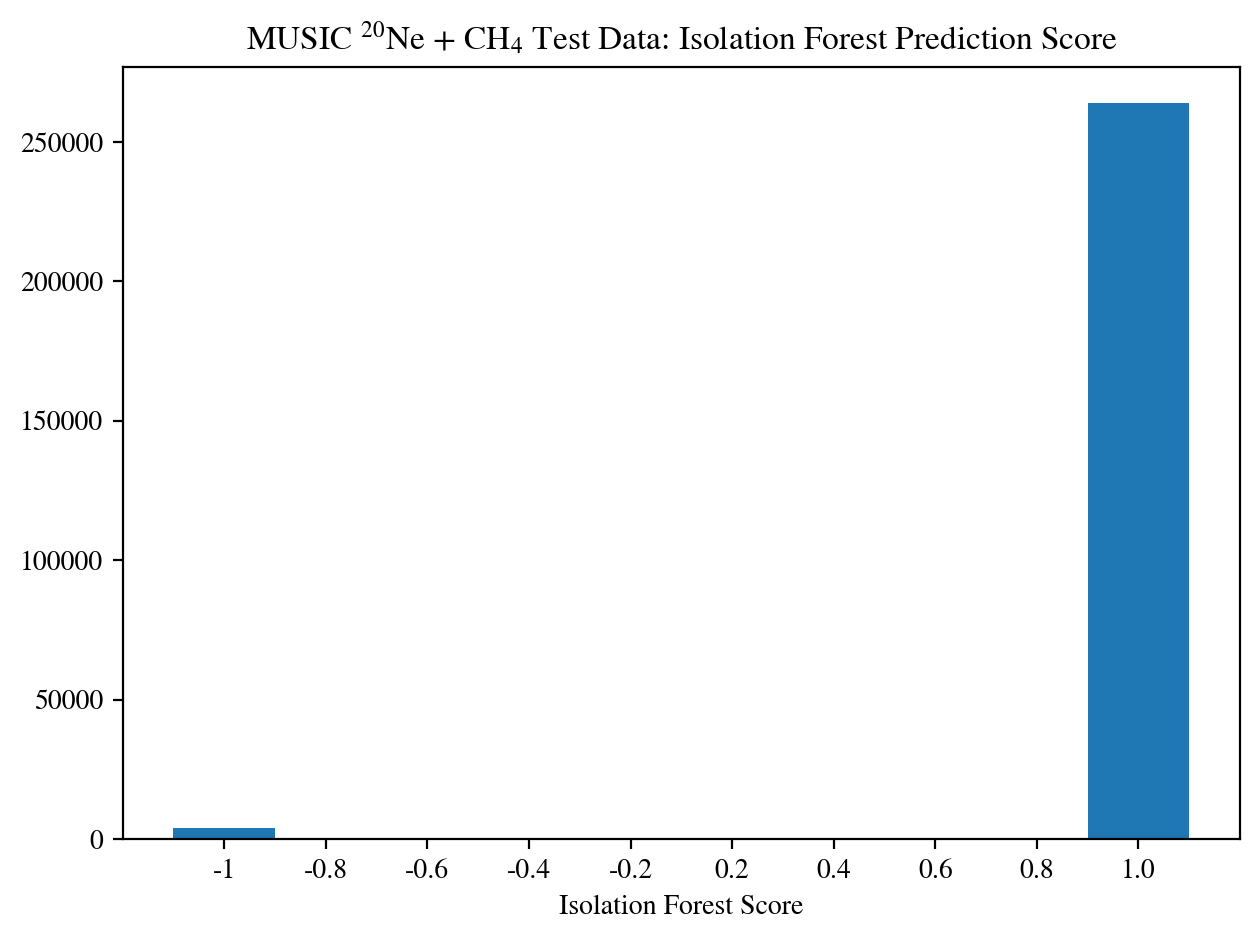

In [13]:
plt.title(r'MUSIC $^{20}$Ne + CH$_{4}$ Test Data: Isolation Forest Prediction Score')
counts, bins, patches = plt.hist(predictions)
plt.xlabel('Isolation Forest Score')
bin_centers = (bins[:-1] + bins[1:]) / 2
# print(bin_centers)
bin_labels = np.arange(-1,1.2,0.2)
plt.xticks(bin_centers, ('-1', '-0.8', '-0.6', '-0.4', '-0.2', '0.2', '0.4', '0.6', '0.8', '1.0'))

plt.tight_layout()
plt.show()

What do these "outlier" events look like? We can add the isolation forest score to the dataframe and we can cut the events with an IFscore=1 (remove the inlier set). Then we can plot the outliers and see what the isolation forest gave us.

In [14]:
# df_isofor = pd.DataFrame(df_MinMax)
df['IFscore'] = predictions

df

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,IFscore
0,1003.0,416.0,401.0,420.0,377.0,410.0,411.0,417.0,433.0,456.0,451.0,426.0,497.0,497.0,492.0,495.0,494.0,402.0,1
1,1091.0,397.0,403.0,408.0,397.0,398.0,436.0,392.0,410.0,408.0,449.0,458.0,465.0,466.0,563.0,502.0,522.0,380.0,1
2,1083.0,426.0,395.0,406.0,410.0,394.0,406.0,401.0,427.0,443.0,444.0,441.0,485.0,484.0,539.0,503.0,522.0,402.0,1
3,1002.0,405.0,378.0,394.0,417.0,441.0,435.0,428.0,401.0,443.0,451.0,458.0,506.0,472.0,479.0,503.0,504.0,400.0,1
4,1015.0,393.0,398.0,410.0,421.0,439.0,413.0,411.0,438.0,391.0,422.0,451.0,479.0,477.0,478.0,476.0,506.0,366.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267824,1040.0,401.0,396.0,418.0,413.0,450.0,444.0,405.0,407.0,423.0,423.0,446.0,492.0,464.0,467.0,454.0,498.0,403.0,1
267825,969.0,366.0,396.0,422.0,399.0,444.0,383.0,419.0,419.0,413.0,419.0,450.0,469.0,475.0,496.0,482.0,517.0,384.0,1
267826,958.0,376.0,395.0,394.0,398.0,432.0,415.0,402.0,411.0,430.0,434.0,465.0,473.0,459.0,481.0,456.0,497.0,398.0,1
267827,1006.0,383.0,371.0,430.0,400.0,447.0,419.0,402.0,393.0,411.0,407.0,428.0,475.0,471.0,498.0,489.0,442.0,393.0,1


In [15]:
# df_select = df_isofor.drop(df_isofor.loc[df_isofor['IFscore']==1].index, inplace=False).reset_index(drop=True)
df_select = df.drop(df.loc[df['IFscore']==1].index, inplace=False).reset_index(drop=True)

df_select

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,IFscore
0,999.0,429.0,391.0,424.0,408.0,450.0,371.0,436.0,373.0,456.0,433.0,461.0,426.0,455.0,461.0,513.0,459.0,391.0,-1
1,1033.0,395.0,347.0,435.0,383.0,429.0,436.0,394.0,395.0,422.0,383.0,440.0,419.0,469.0,449.0,495.0,476.0,379.0,-1
2,1083.0,417.0,386.0,397.0,395.0,454.0,422.0,460.0,435.0,449.0,471.0,488.0,521.0,512.0,568.0,529.0,552.0,399.0,-1
3,1726.0,410.0,387.0,404.0,415.0,445.0,419.0,432.0,440.0,444.0,452.0,468.0,558.0,467.0,661.0,520.0,747.0,472.0,-1
4,1988.0,740.0,738.0,757.0,769.0,819.0,773.0,750.0,796.0,719.0,846.0,791.0,925.0,866.0,948.0,888.0,967.0,778.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3992,2096.0,783.0,762.0,782.0,750.0,827.0,845.0,785.0,822.0,780.0,843.0,855.0,905.0,900.0,944.0,912.0,925.0,830.0,-1
3993,958.0,384.0,374.0,395.0,396.0,420.0,377.0,452.0,378.0,410.0,389.0,464.0,431.0,462.0,457.0,491.0,466.0,397.0,-1
3994,2030.0,745.0,766.0,757.0,776.0,811.0,791.0,786.0,809.0,779.0,841.0,840.0,917.0,866.0,938.0,950.0,907.0,781.0,-1
3995,1986.0,590.0,581.0,616.0,617.0,698.0,657.0,627.0,621.0,637.0,676.0,684.0,706.0,725.0,730.0,736.0,739.0,656.0,-1


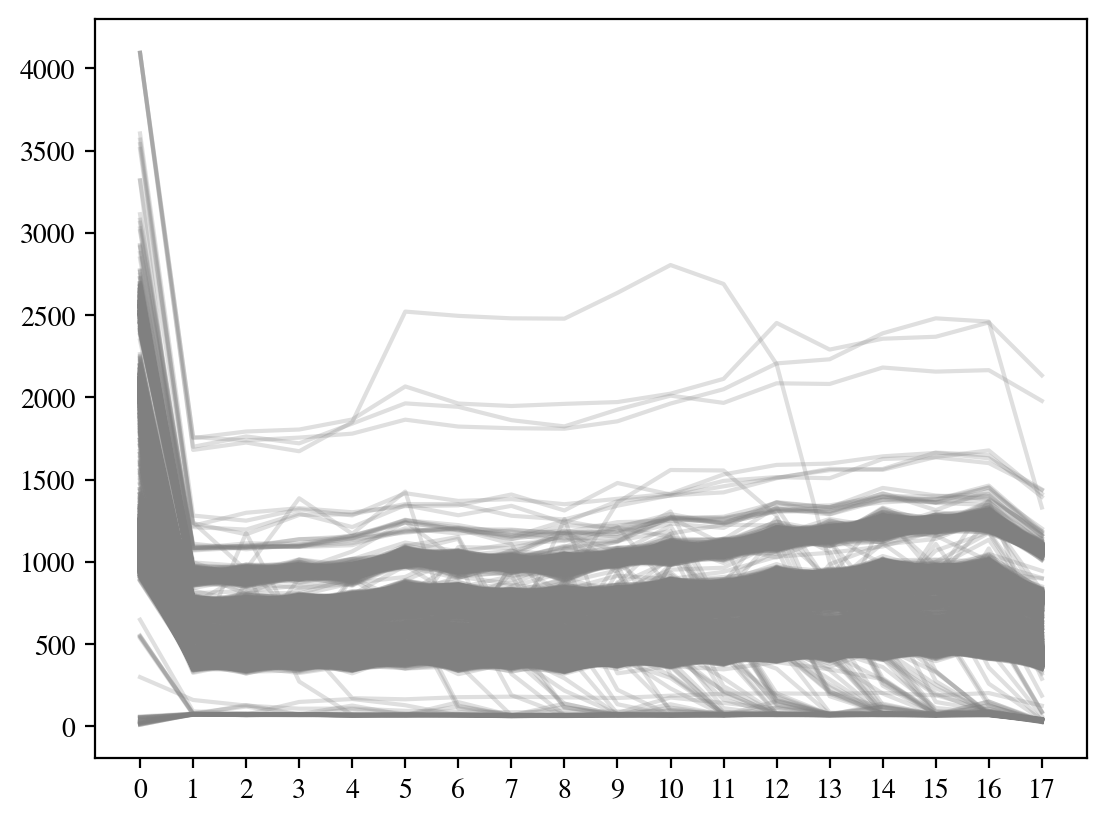

In [16]:
for i in range(len(df_select.index)):
    plt.plot(strip_num, df_select.iloc[i,0:18], color='grey', alpha=0.25)

plt.xticks(strip_num, strip_num)
plt.show()

Plotting the traces of our outlier set, we can see four things. 

- Traces that look like beam (traces around channel 500 in strips 1 - 16)
- Pile-up traces (traces around channel 1000 in strips 1 - 16)
- A contaminant in the beam (traces that are up or above channel 1500)
- What looks like, some potential fusion events hiding in the background

We thus see a valuable lesson in using these "auto-sorting" methods. You will often get better results if you can clean up the data a bit. For this MUSIC data set, that means making a cut in strip 0 to remove the pile-up and the beam contaminant. This time we didn't normalize the beam, so strip 0 and 17 look a little weird from the difference in gain. But, we can make a quick cut in strip 0 anyways which should make things easier to see.

In [17]:
# This includes the contaminant and pile-up, cut pile-up
df_select.drop(df_select[df_select.s0 > 1114].index, # Nothing with strip 0 larger than 1114
                                inplace=True) # Do not make copy, make the cut "inplace"

df_select.describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,IFscore
count,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.000000,1283.0
mean,1012.997681,395.386597,386.184723,401.458313,397.963379,433.332825,413.067810,416.532349,410.886993,428.417786,440.537018,444.247070,471.889313,464.558838,490.318787,479.752136,503.067810,391.370239,-1.0
std,156.236374,59.463856,67.468353,65.841393,74.081673,80.885742,92.463036,90.878952,105.958885,101.805092,117.233467,98.059334,126.209785,107.280586,136.706589,121.924767,150.098907,104.105072,0.0
min,10.000000,71.000000,69.000000,67.000000,65.000000,65.000000,65.000000,62.000000,62.000000,66.000000,65.000000,67.000000,67.000000,67.000000,68.000000,66.000000,67.000000,27.000000,-1.0
25%,997.000000,385.000000,370.000000,393.000000,378.000000,420.000000,380.000000,399.000000,375.000000,409.000000,397.000000,432.000000,433.000000,453.000000,446.000000,470.000000,458.000000,386.000000,-1.0
50%,1040.000000,403.000000,391.000000,409.000000,403.000000,438.000000,410.000000,419.000000,407.000000,431.000000,434.000000,450.000000,469.000000,476.000000,488.000000,496.000000,506.000000,404.000000,-1.0
75%,1078.000000,419.000000,409.000000,422.000000,425.000000,455.000000,445.000000,434.000000,441.000000,447.000000,475.000000,468.000000,513.000000,500.000000,540.000000,520.000000,553.500000,432.000000,-1.0
max,1114.000000,747.000000,1176.000000,952.000000,1064.000000,1245.000000,1141.000000,1109.000000,1261.000000,1216.000000,1307.000000,1226.000000,1332.000000,1162.000000,1298.000000,1160.000000,1374.000000,946.000000,-1.0


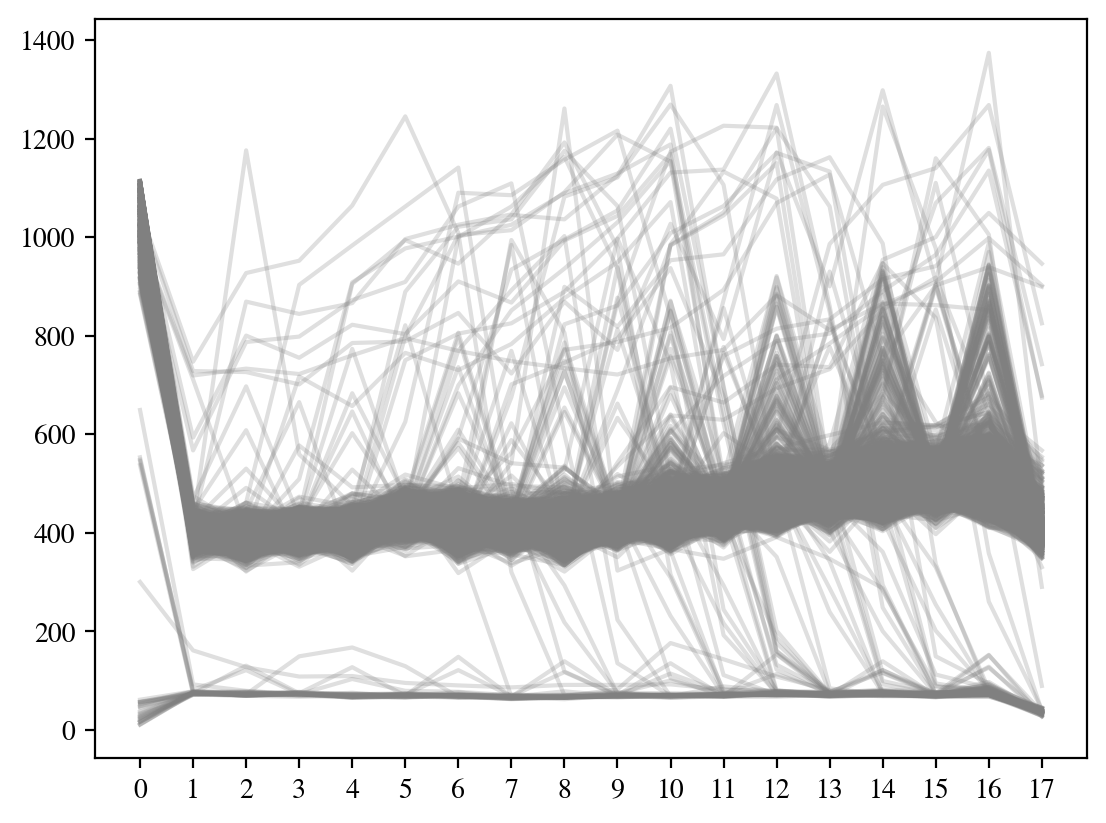

In [18]:
for i in range(len(df_select.index)):
    plt.plot(strip_num, df_select.iloc[i,0:18], color='grey', alpha=0.25)

plt.xticks(strip_num, strip_num)
plt.show()

Now we can see the potential fusion events much more clearly. There are still some events that look beam like. However, as you will see in a second, there are occasionally some beam events where either the beam enters MUSIC at an angle, a bunch ends up way off center, or there is some noise in the electronics which can cause "jaggy" traces. We can use a quick little algorithm using np.where to color the traces and identify some potential events in strips 2 through 10.

In [19]:
from matplotlib.ticker import MaxNLocator

100%|█████████████████████████████████████████████████████████████████████████████████████████| 1283/1283 [00:01<00:00, 1173.92it/s]


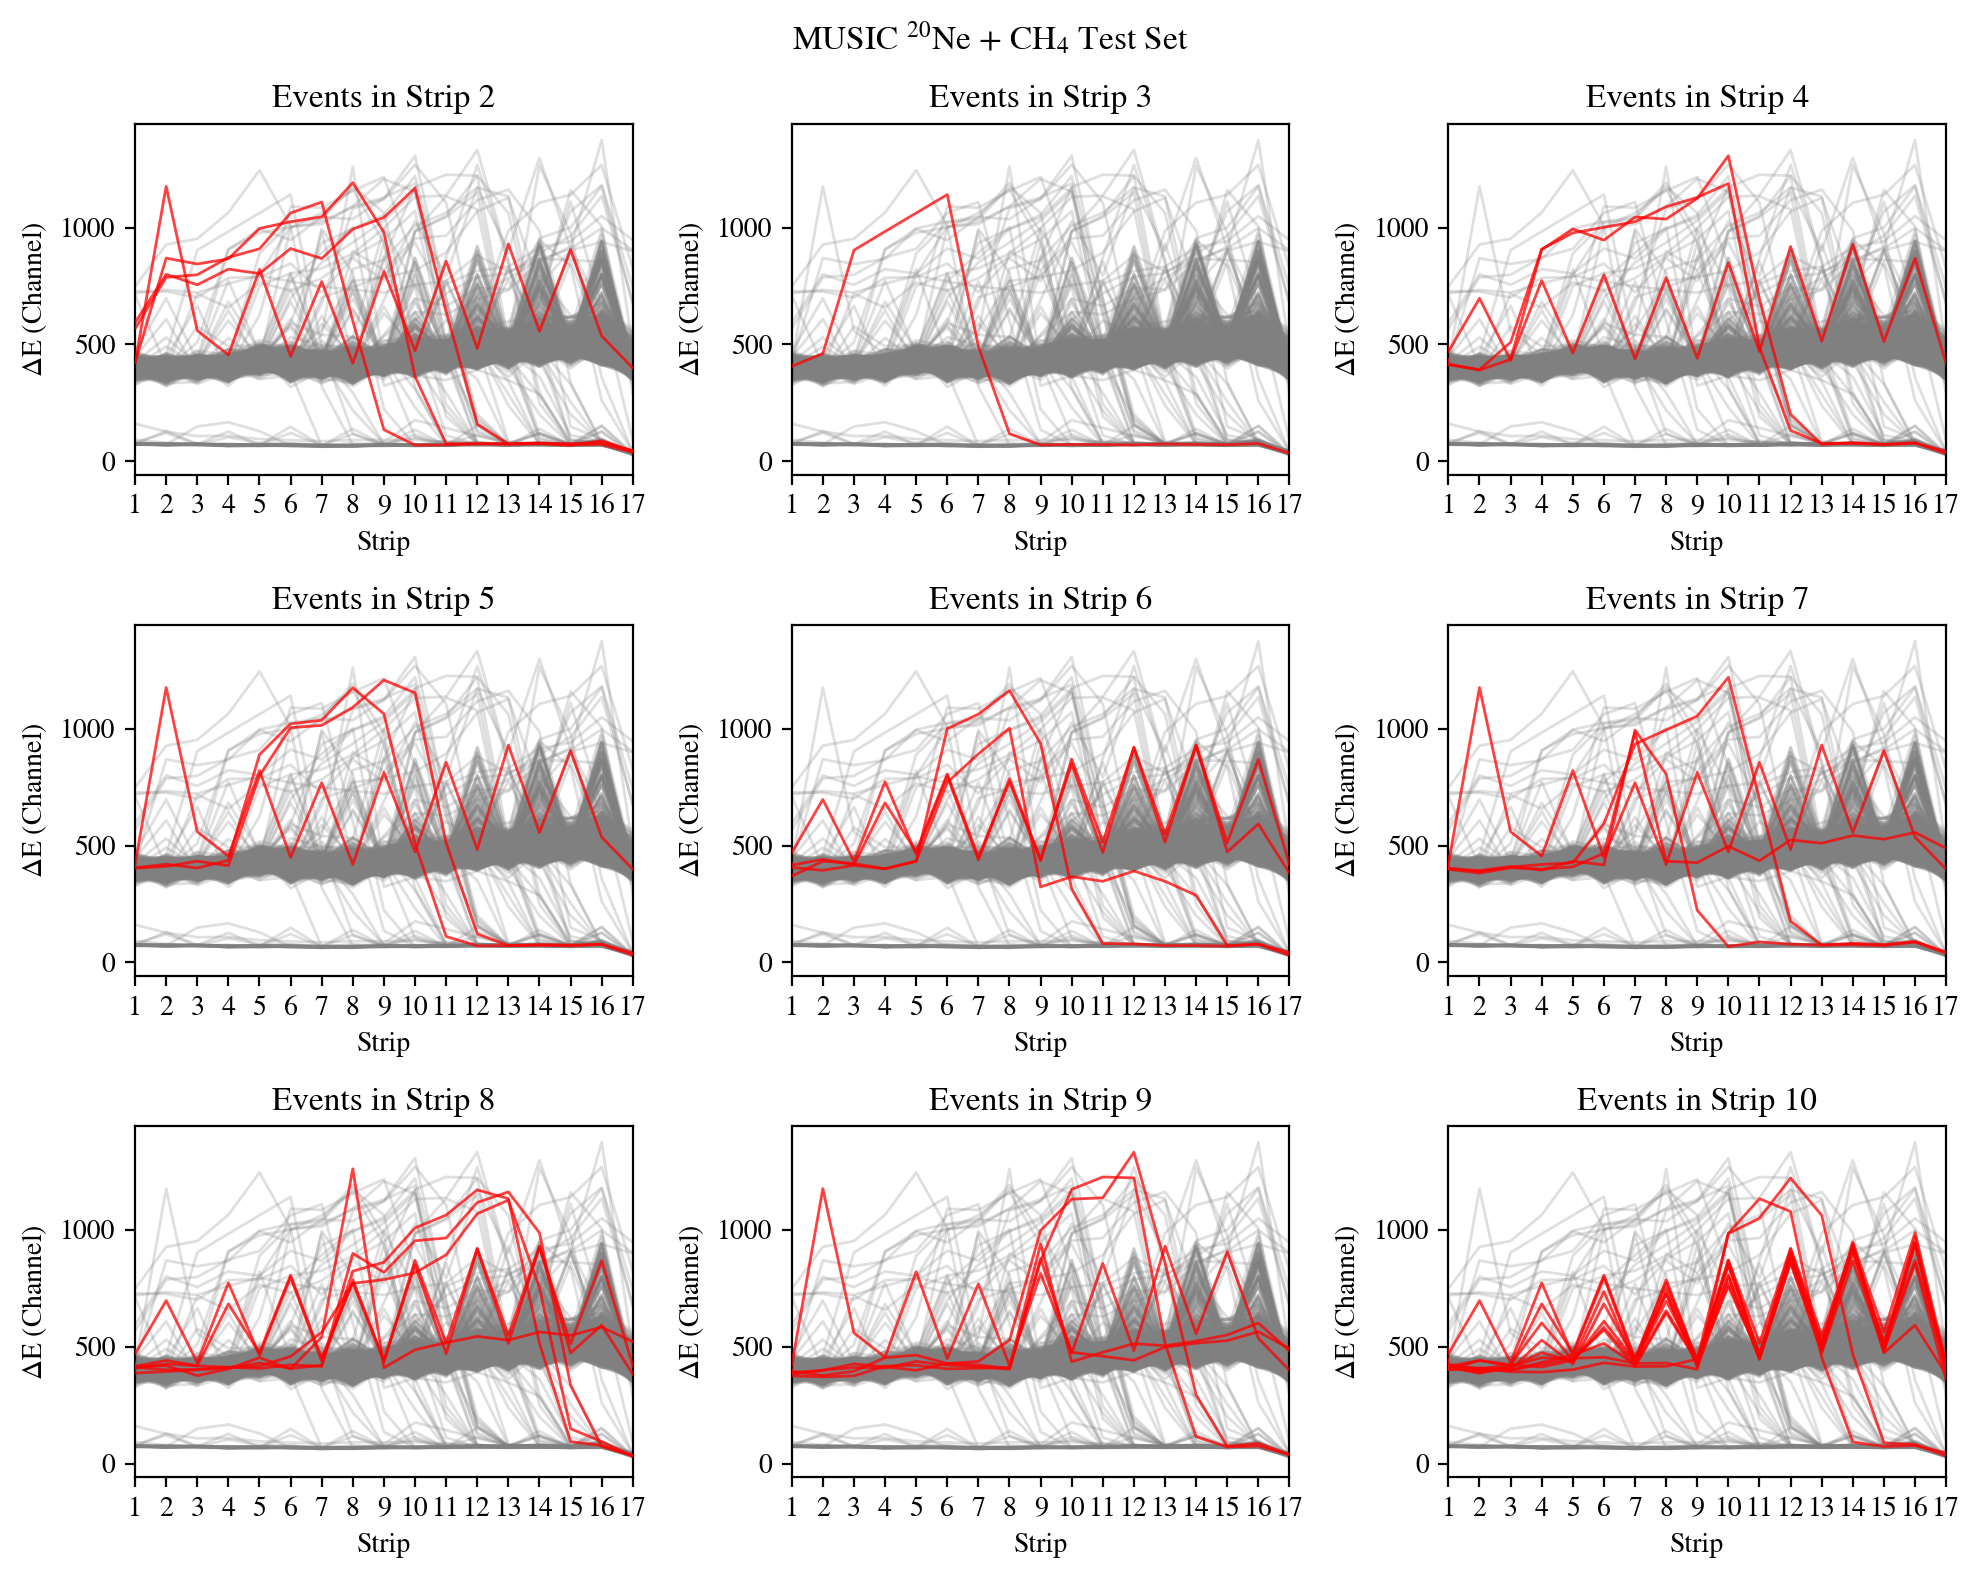

In [20]:
row_ix = (0,0,0,1,1,1,2,2,2)
col_ix = (0,1,2,0,1,2,0,1,2)

fig, ax = plt.subplots(3,3)
fig.suptitle(r'MUSIC $^{20}$Ne + CH$_{4}$ Test Set')

for i in range(2,11):
    #
    color = np.where(df_select[f's{i-1}'] < 600.0, np.where(df_select[f's{i}'] > 750.0, 'red', 'grey'), 'grey') 
    alpha = np.where(df_select[f's{i-1}'] < 600.0, np.where(df_select[f's{i}'] > 750.0, 0.75, 0.25), 0.25) 
    zorder = np.where(df_select[f's{i-1}'] < 600.0, np.where(df_select[f's{i}'] > 750.0, 100, 1), 1) 
    #
    ax[row_ix[i-2],col_ix[i-2]].set_title(f'Events in Strip {i}')
    # loop over the traces
    for j in tqdm(range(len(df_select.index))):
        ax[row_ix[i-2],col_ix[i-2]].plot(strip_num,
                   df_select.iloc[j,0:18],
                   color=color[j],
                   alpha=alpha[j], 
                   linewidth=1,
                   zorder=zorder[j])
    #
    ax[row_ix[i-2],col_ix[i-2]].set_xlabel('Strip')
    ax[row_ix[i-2],col_ix[i-2]].xaxis.set_major_locator(MaxNLocator(nbins=18, integer=True)) # major x-axis ticks at integer values (one of many ways to do this)
    ax[row_ix[i-2],col_ix[i-2]].set_xlim(1,17)
    ax[row_ix[i-2],col_ix[i-2]].set_ylabel(r'$\Delta$E (Channel)')

fig.set_size_inches(10,8)
plt.tight_layout()
plt.show()

Now, it is even easier to see these "jaggy" traces. Perhaps more important is we can also see some good looking fusion like events as well. After seeing this result, it seems as though some of these steps where done in a non-ideal order. However, having first done them in the less ideal order it is hopefully a little easier to understand how you should acutally go about using this algorithm.  

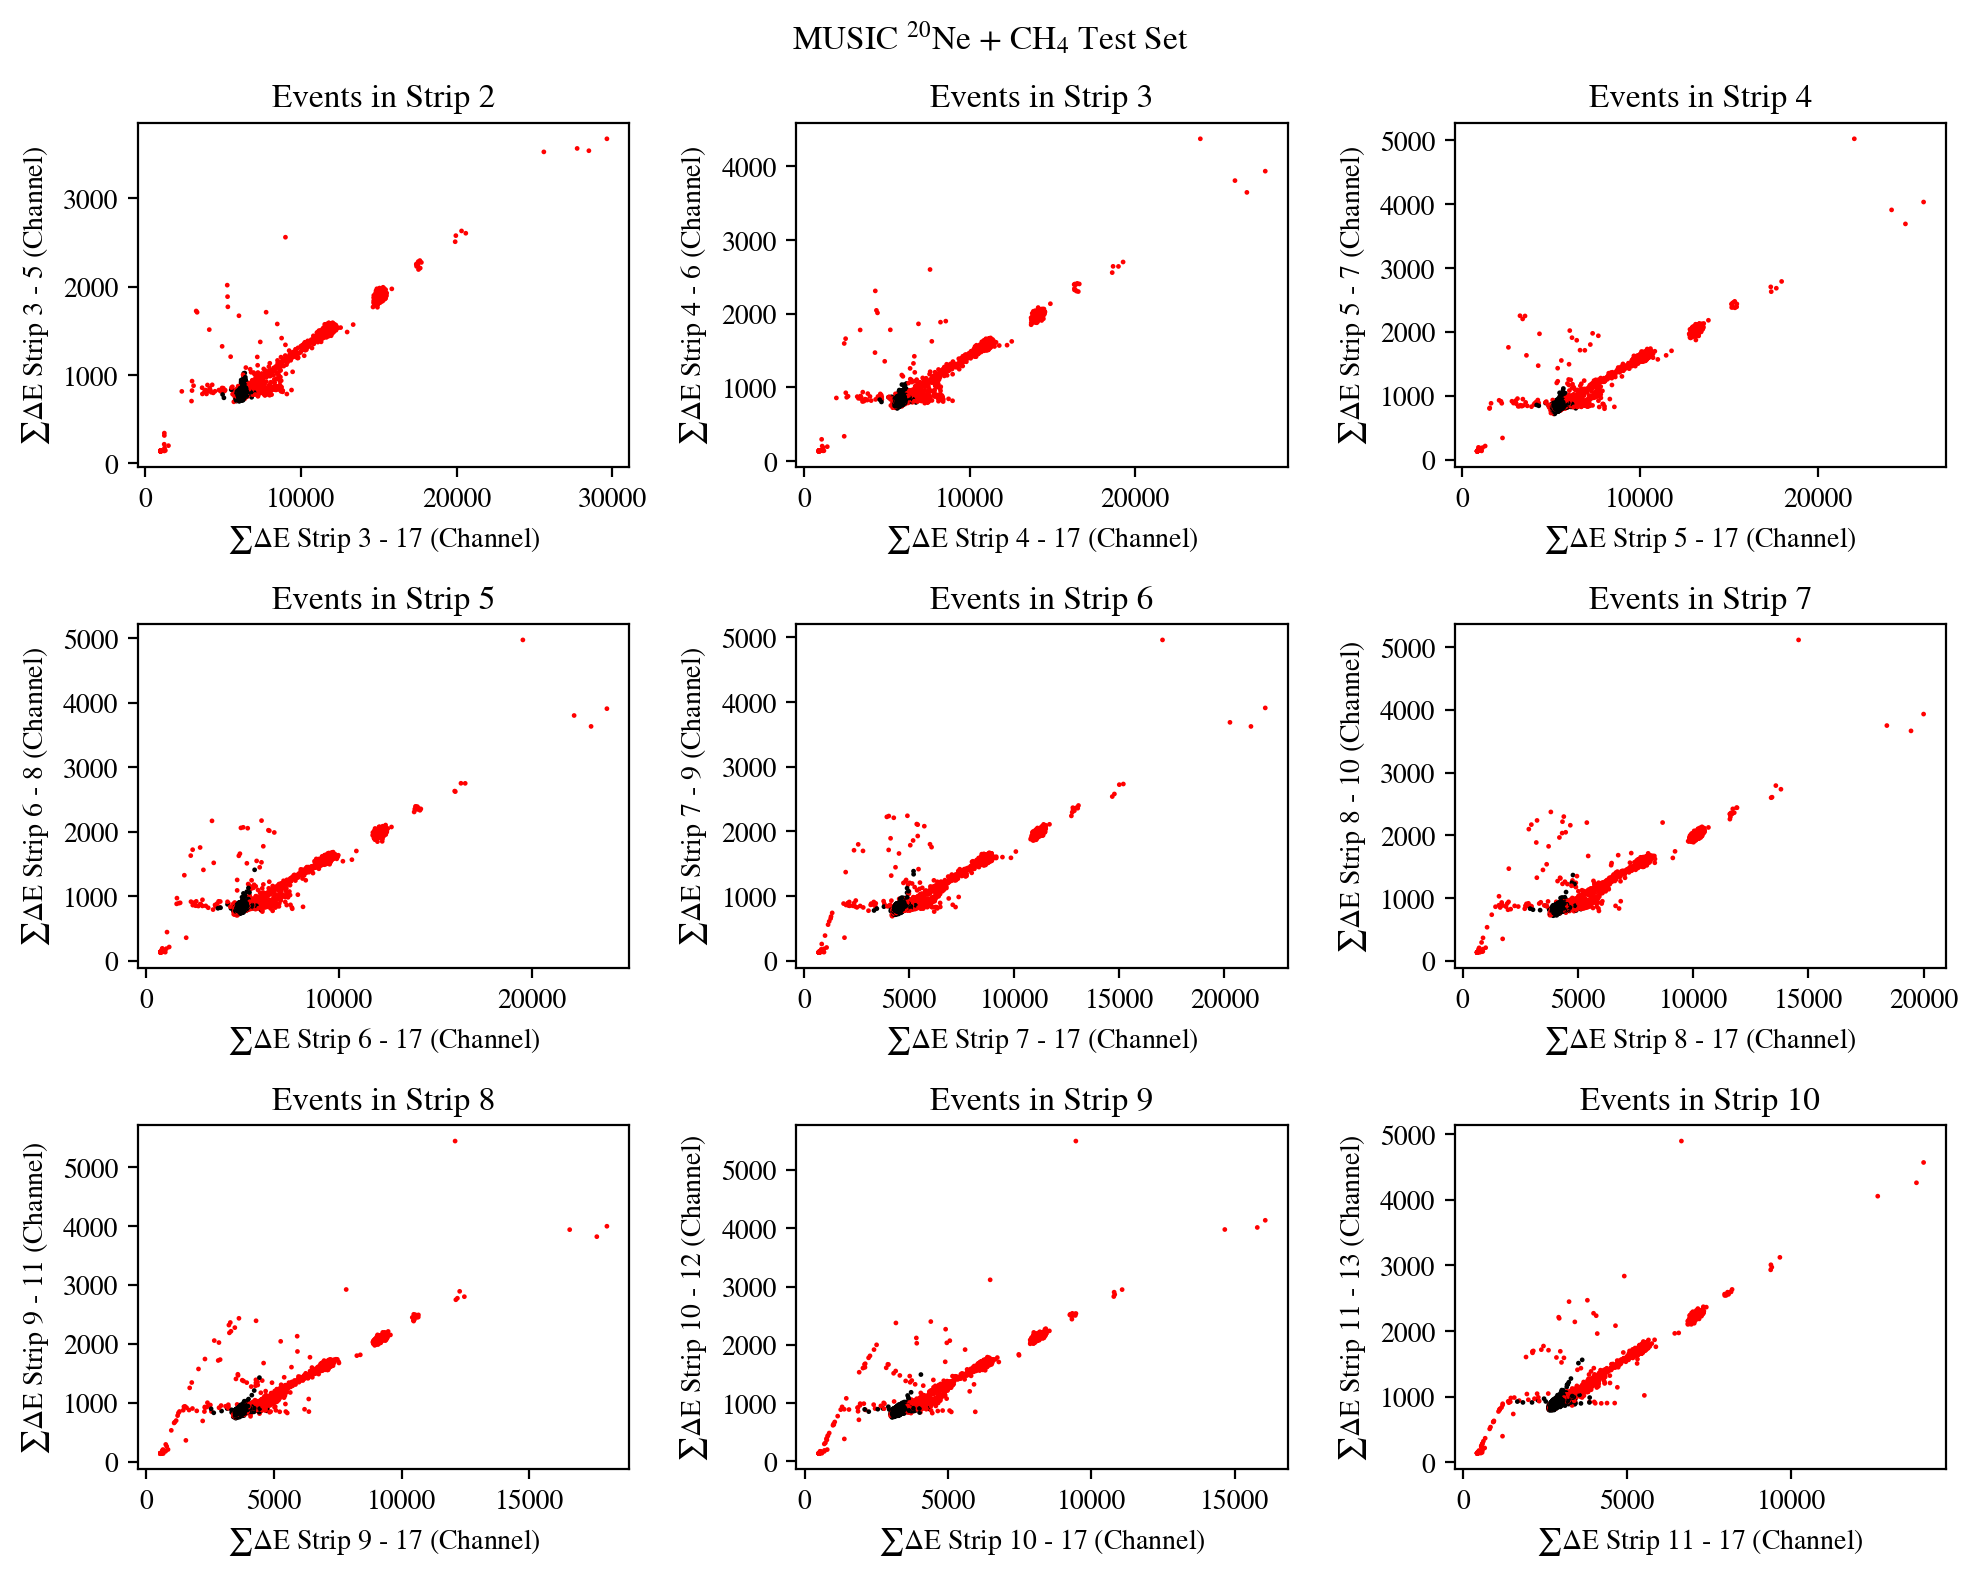

In [21]:
row_ix = (0,0,0,1,1,1,2,2,2)
col_ix = (0,1,2,0,1,2,0,1,2)

fig, ax = plt.subplots(3,3)
fig.suptitle(r'MUSIC $^{20}$Ne + CH$_{4}$ Test Set')

for i in range(0,9):
    #
    color = np.where(df['IFscore'] < 0, 'red', 'black') 
    #
    ax[row_ix[i],col_ix[i]].set_title(f'Events in Strip {i + 2}')
    ax[row_ix[i],col_ix[i]].scatter(df.iloc[:,i+3:17].sum(axis=1), df.iloc[:,i+3:i+5].sum(axis=1), marker='.', s=2, color=color)
    #
    ax[row_ix[i],col_ix[i]].set_xlabel(f'$\sum\Delta$E Strip {i+3} - 17 (Channel)')
    ax[row_ix[i],col_ix[i]].set_ylabel(f'$\sum\Delta$E Strip {i+3} - {i+5} (Channel)')

fig.set_size_inches(10,8)
plt.tight_layout()
plt.show()

## Visualizing the Boundaries of the Isolation Forest Algorithm

If you want to get a better sense of where the isolation forest algorithm splits the branches, we can use the display tools from scikit-learn inspection. This is intended to work with two features at a time. For our data we can make a couple of plots comparing strip 2,3,4 and 5 verses strip 0. This will give us a set of boundaries as contours which we will plot on top of a scatter plot. To make things a little easier to see, we can also color the points of the scatter plots by the IFscore.

In [22]:
from sklearn.inspection import DecisionBoundaryDisplay

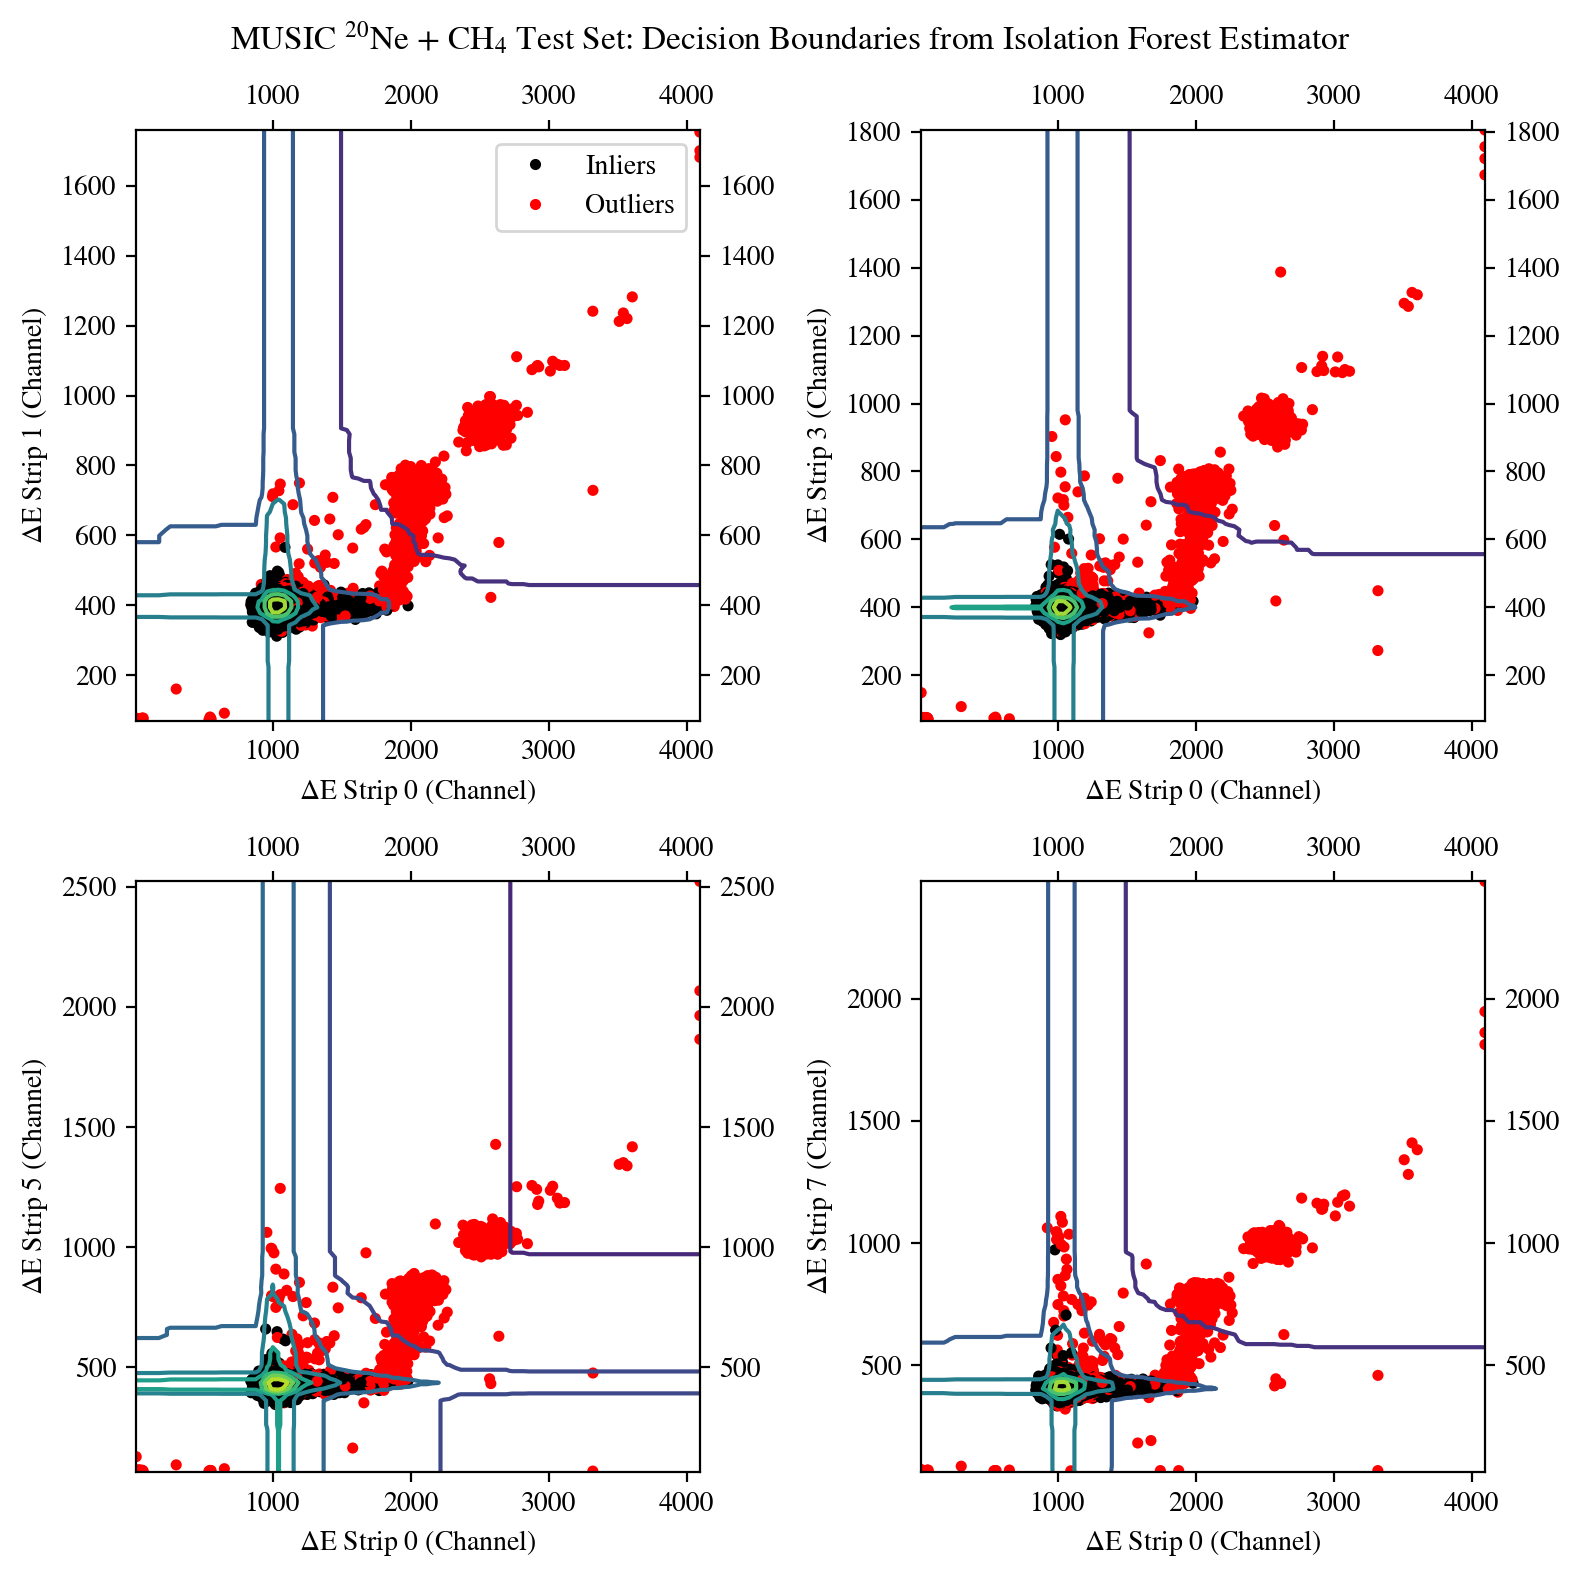

In [23]:
row_ix = (0,0,1,1)
col_ix = (0,1,0,1)
color = np.where(df['IFscore'] < 0, 'r', 'k')
strip = (1,3,5,7)

fig, ax = plt.subplots(2,2)
fig.suptitle(r'MUSIC $^{20}$Ne + CH$_{4}$ Test Set: Decision Boundaries from Isolation Forest Estimator')

for i in range(4):
    subset = df.iloc[:, [0,strip[i]]]
    # Get decision boundaries
    DecisionBoundaryDisplay.from_estimator(
        IsolationForest(random_state=0).fit(subset),
        subset,
        plot_method='contour',
        ax =  ax[row_ix[i], col_ix[i]],
        xlabel = f'$\Delta$E Strip 0 (Channel)',
        ylabel = f'$\Delta$E Strip {strip[i]} (Channel)',
        response_method='auto')
    # Scatter plot using IFscore
    ax[row_ix[i], col_ix[i]].scatter(subset.iloc[:, 0], subset.iloc[:, 1], c=color, marker='.')
    ax[row_ix[i], col_ix[i]].tick_params(labeltop=True, top=True, labelright=True, right=True) # ticks and labels top and right sides

# Custom Legend in top right plot
handles = [Line2D([0], [0], c='k', marker='.', linestyle=''), 
           Line2D([0], [0], c='r', marker='.', linestyle='')]
labels = ['Inliers', 'Outliers']
ax[0,0].legend(handles, labels)

fig.set_size_inches(8,8)
fig.tight_layout()
plt.show()